In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [10]:
df = pd.read_csv('salary.csv')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df = df.drop_duplicates()
print(df.shape)

(32537, 15)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


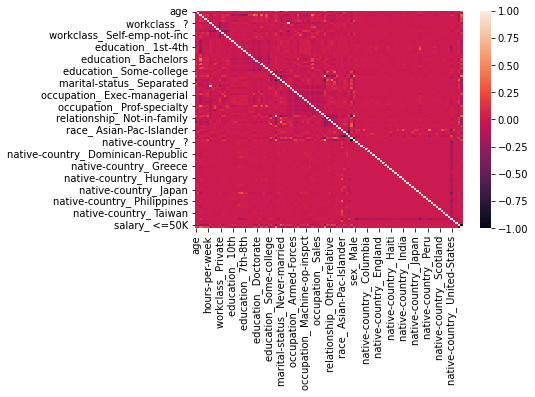

In [20]:
data = pd.get_dummies(df)
sns.heatmap(data.corr())

In [51]:
df['native-country'].value_counts()[:7]

 United-States    29153
 Mexico             639
 ?                  582
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
Name: native-country, dtype: int64

Text(0.5, 1.0, 'native-country')

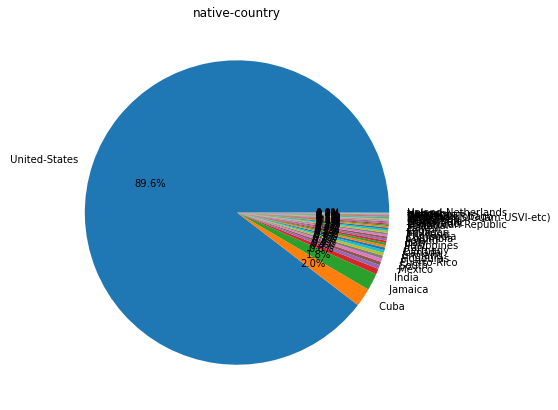

In [61]:
fig = plt.figure(figsize=(7,7))
plt.pie(df['native-country'].value_counts(), labels = df['native-country'].unique(), autopct='%1.1f%%')
plt.title("native-country")

Text(0.5, 1.0, 'marital-status')

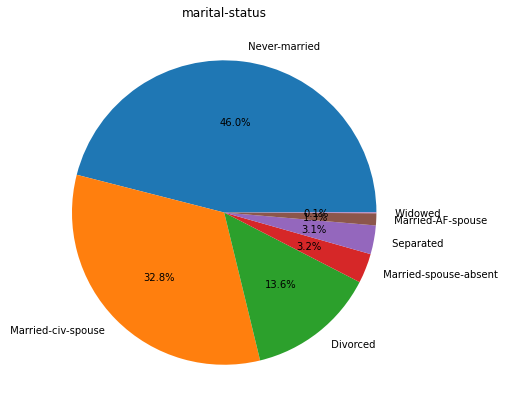

In [62]:
fig = plt.figure(figsize=(7,7))
plt.pie(df['marital-status'].value_counts(), labels = df['marital-status'].unique(), autopct='%1.1f%%')
plt.title('marital-status')

Text(0.5, 1.0, 'sex')

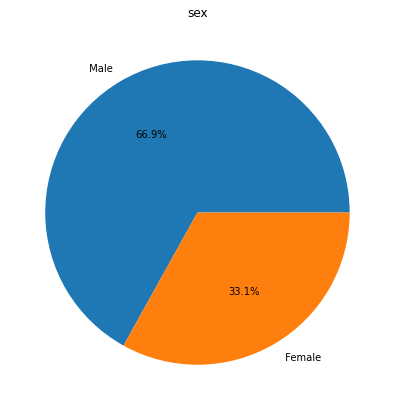

In [63]:
fig = plt.figure(figsize=(7,7))
plt.pie(df['sex'].value_counts(), labels = df['sex'].unique(), autopct='%1.1f%%')
plt.title("sex")

In [21]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


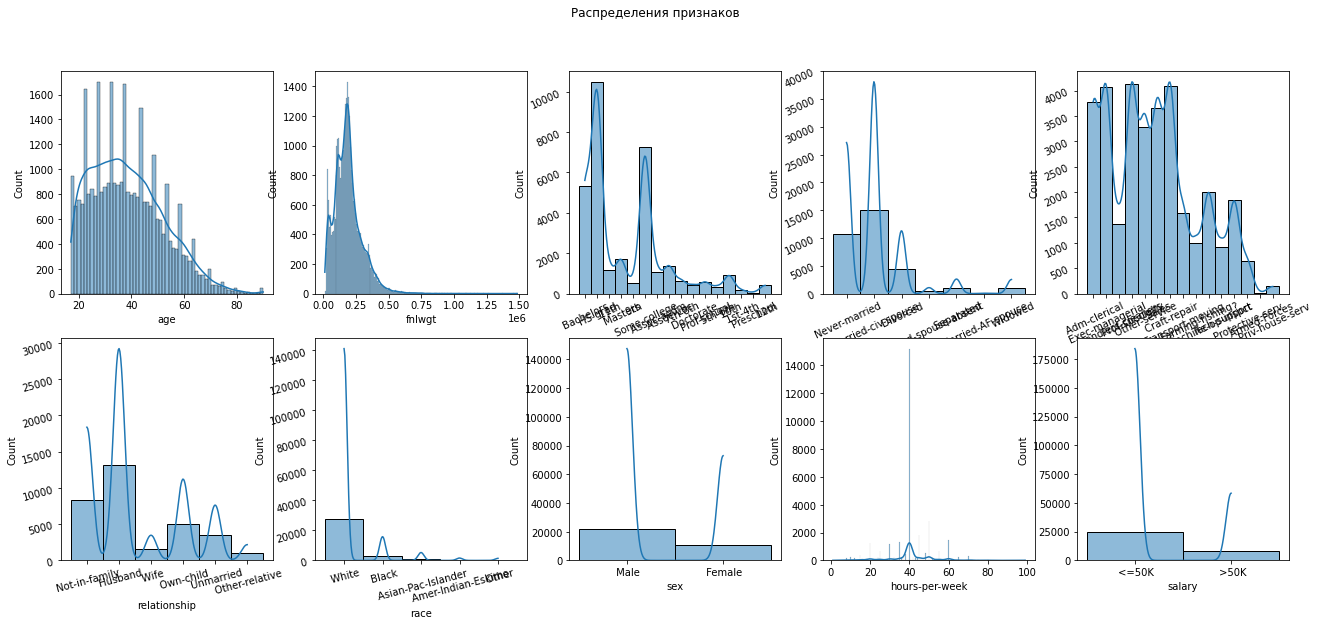

In [42]:
fig, ax = plt.subplots(2,5, figsize=(22,9))
ax[0][2].tick_params(labelrotation=25)
ax[0][3].tick_params(labelrotation=25)
ax[0][4].tick_params(labelrotation=25)
ax[1][0].tick_params(labelrotation=15)
ax[1][1].tick_params(labelrotation=15)
fig.suptitle('Распределения признаков')

sns.histplot(df['age'], ax = ax[0][0], kde = True)
sns.histplot(df['fnlwgt'], ax = ax[0][1], kde = True)
sns.histplot(df['education'], ax = ax[0][2], kde = True)
sns.histplot(df['marital-status'], ax = ax[0][3], kde = True)
sns.histplot(df['occupation'], ax = ax[0][4], kde = True)
sns.histplot(df['relationship'], ax = ax[1][0], kde = True)
sns.histplot(df['race'], ax = ax[1][1], kde = True)
sns.histplot(df['sex'], ax = ax[1][2], kde = True)
sns.histplot(df['hours-per-week'], ax = ax[1][3], kde = True)
sns.histplot(df['salary'], ax = ax[1][4], kde = True)

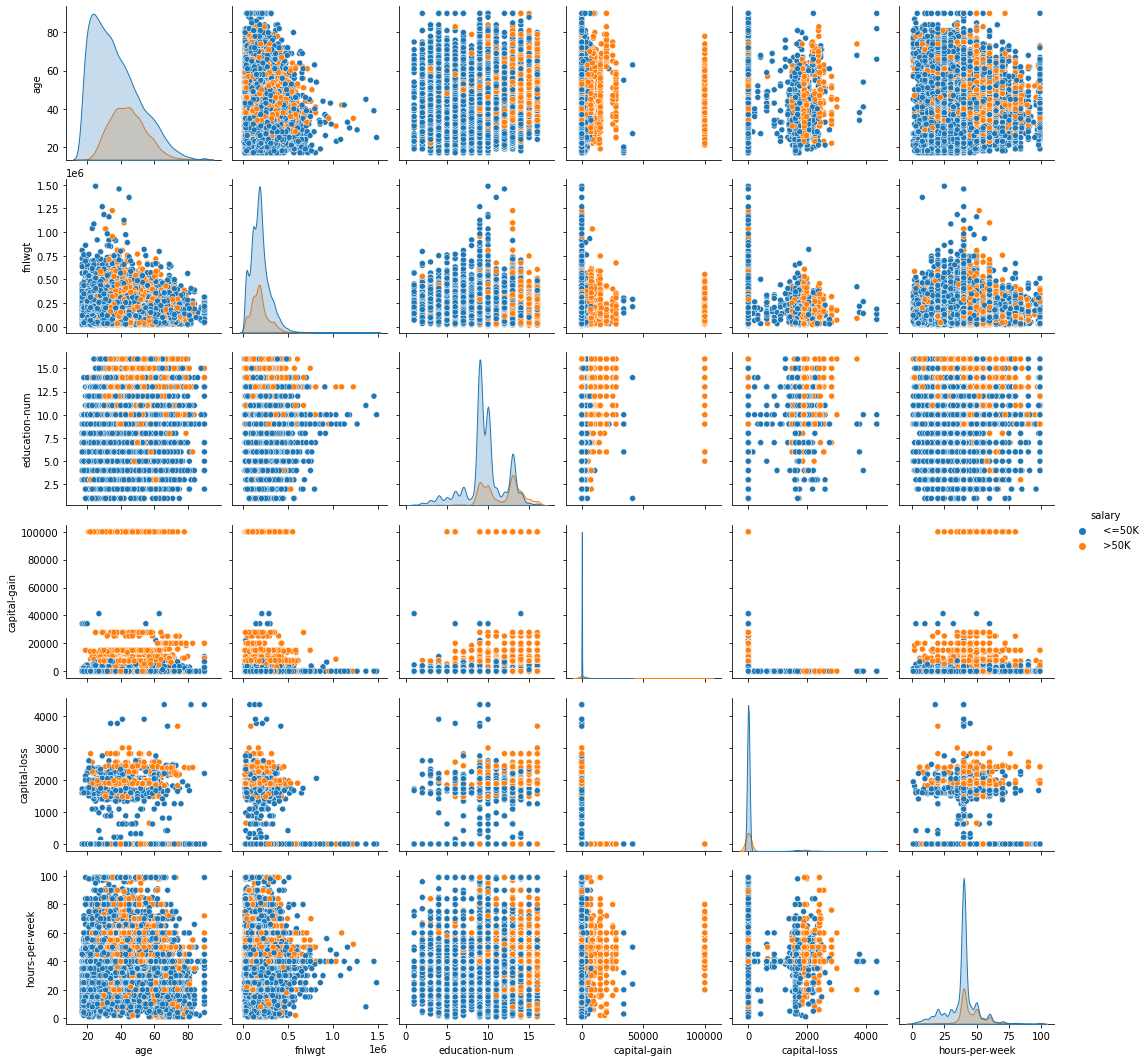

In [64]:
sns.pairplot(data=df, hue='salary')

In [71]:
X = pd.get_dummies(df.drop(columns='salary'))
Y = df['salary'].apply(lambda x: 0 if x == ' <=50K' else 1)

x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.25, random_state=22)

In [286]:
import pickle

def save(model, name):
  with open('best_' + name + '.pickle', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

In [287]:
from sklearn.metrics import euclidean_distances
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class KNeighbors(ClassifierMixin, BaseEstimator):
    def __init__(self, k = 1):
        self.k = k

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])
        
        # Input validation
        X = check_array(X)
        
        y = np.ndarray((X.shape[0],))
        for (i, elem) in enumerate(X):
            distances = euclidean_distances([elem], self.X_)[0]
            neighbors = np.argpartition(distances, kth = self.k - 1)
            k_neighbors = neighbors[:self.k]
            labels, cnts = np.unique(self.y_[k_neighbors], return_counts = True)
            y[i] = labels[cnts.argmax()]
        return y

In [288]:
grid_search = GridSearchCV(Pipeline([('knn', KNeighbors())]), {'knn__k' : [5, 10]})
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighbors())]),
             param_grid={'knn__k': [5, 10]})

In [289]:
grid_search.best_score_

0.7961641997575074

In [290]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

def scores(y, y_pred):
    conf_mat = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
    conf_mat.plot()
    RocCurveDisplay.from_predictions(y, y_pred)
    plt.show()
    print(f"Accuracy tests: {accuracy_score(y, y_pred)}")
    print(f"Precision tests: {precision_score(y, y_pred)}")
    print(f"Recall tests: {recall_score(y, y_pred)}")

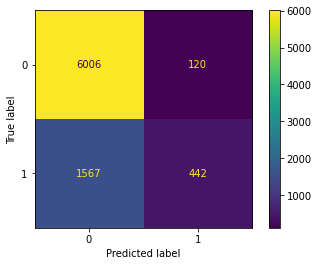

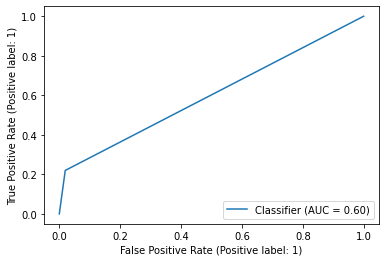

Accuracy tests: 0.7926244622003688
Precision tests: 0.7864768683274022
Recall tests: 0.22000995520159283


In [291]:
scores(y_test, grid_search.best_estimator_.predict(x_test))

In [292]:
save(grid_search.best_estimator_, 'KNN')

In [293]:
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(Pipeline([('knn', KNeighborsClassifier())]), {'knn__n_neighbors' : [10, 20, 40]})
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [10, 20, 40]})

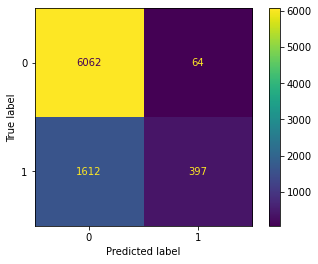

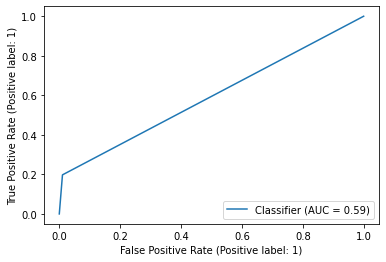

Accuracy tests: 0.7939766441303011
Precision tests: 0.8611713665943601
Recall tests: 0.19761075161772026


In [294]:
scores(y_test, grid_search.best_estimator_.predict(x_test))

In [355]:
class Linear(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=1e-03, epoch=1, batch_size=64):
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
    
    def sigmoid(self, x):
        self.l = 1 / (1 + np.exp(-x))
        return self.l
        
    def fit(self, X, y):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(X[0]),))
        
        for i in range(self.epoch):
            for i in range(0, len(X), self.batch_size):
                xb = X[i:i + self.batch_size]
                yb = y[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                s = self.sigmoid(p)
                dp = np.dot(xb.T, (s - yb).T)
                self.W -= self.lr * dp

    def predict(self, x):
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis = 1)
        p = np.dot(self.W, x.T)
        s = self.sigmoid(p)
        return (s > 0.5).astype('int64')

In [356]:
grid_search = GridSearchCV(Pipeline([('Linear', Linear())]), {'Linear__lr' : [1e-03], 'Linear__epoch' : [250]})

In [357]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


GridSearchCV(estimator=Pipeline(steps=[('Linear', Linear())]),
             param_grid={'Linear__epoch': [20], 'Linear__lr': [0.001]})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


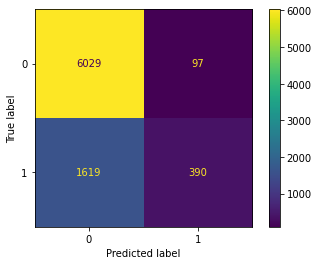

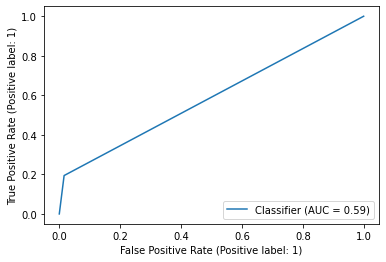

Accuracy tests: 0.789059618930547
Precision tests: 0.8008213552361396
Recall tests: 0.19412643106022898


In [358]:
scores(y_test, grid_search.best_estimator_.predict(x_test))

In [359]:
save(grid_search.best_estimator_, 'Linear')

In [300]:
from sklearn.linear_model import LinearRegression

grid_search = Pipeline([('linear', LinearRegression())])
grid_search.fit(x_train, y_train)

Pipeline(steps=[('linear', LinearRegression())])

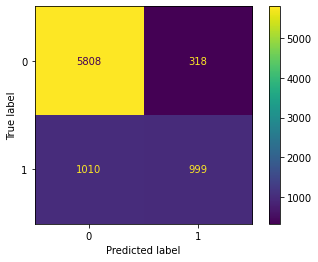

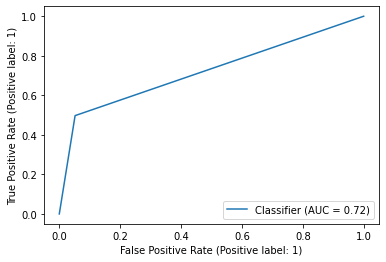

Accuracy tests: 0.8367547633681622
Precision tests: 0.7585421412300684
Recall tests: 0.49726231956197114


In [302]:
scores(y_test, (0.5 < grid_search.predict(x_test)).astype(np.int64))

In [391]:
class SVM(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.1, epoch=1, alpha=0.0001, batch_size=128):
        self.lr = lr
        self.epoch = epoch
        self.alpha = alpha
        self.batch_size = batch_size
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis=1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.epoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                
                p = np.dot(self.W, xb.T)

                sums = np.zeros_like(self.W)
                for i in range(len(p)):
                    if 1 - p[i] * yb[i] > 0:
                        sums -= xb[i] * yb[i]

                dp = 2 * self.alpha * self.W + sums
                self.W -= self.lr * dp
                
                
    def predict(self, x):
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
        p = np.dot(self.W, x.T)
        return np.sign(p)
        
    

In [395]:
grid_search = GridSearchCV(Pipeline([('SVM', SVM())]), {'SVM__lr' : [1e-02], 'SVM__epoch' : [150]})

In [396]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('SVM', SVM())]),
             param_grid={'SVM__epoch': [150], 'SVM__lr': [0.01]})

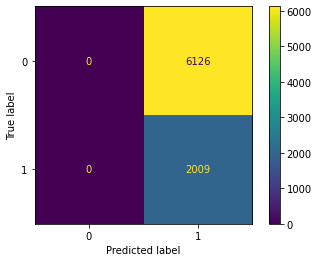

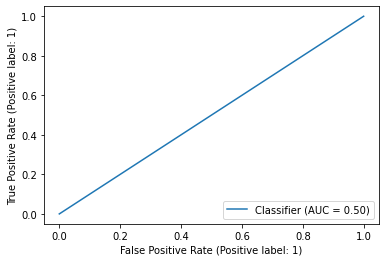

Accuracy tests: 0.24695759065765213
Precision tests: 0.24695759065765213
Recall tests: 1.0


In [398]:
scores(y_test, grid_search.best_estimator_.predict(x_test))

In [307]:
save(grid_search.best_estimator_, 'SVM')

In [308]:
from sklearn.svm import SVC

grid_search = Pipeline([('svc', SVC())])
grid_search.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC())])

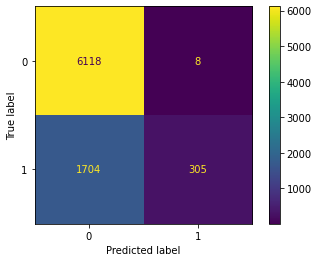

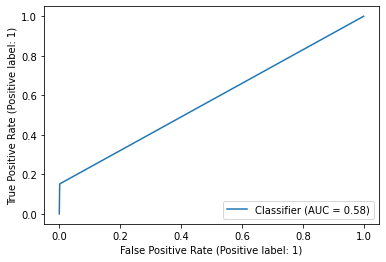

Accuracy tests: 0.7895513214505224
Precision tests: 0.9744408945686901
Recall tests: 0.15181682429069188


In [309]:
scores(y_test, (0.5 < grid_search.predict(x_test)).astype(np.int64))

In [409]:
class hard_vote():
  def __init__(self, estims):
    self.estims = estims
  
  def fit(self, X, y):
    for est in self.estims:
      est.fit(X, y)
    
  def predict(self, X):
    y_pred = np.zeros(X.shape[0])

    for est in self.estims:
      y_pred += est.predict(X)
    
    return (0 < y_pred).astype(np.int64)

In [424]:
ansamble_hard = hard_vote([KNeighborsClassifier(),
                           Linear(lr=1e-03, epoch=250)])

ansamble_hard.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


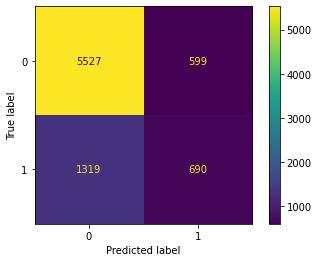

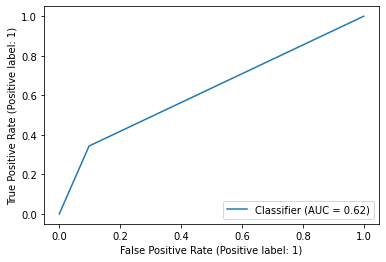

Accuracy tests: 0.7642286416717886
Precision tests: 0.5352986811481769
Recall tests: 0.3434544549527128


In [425]:
scores(y_test, ansamble_hard.predict(x_test))